# Momento de Retroalimentación: Módulo 1 Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Automobile.csv',na_values='?')
df

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## Revisión de datos

Lo primero es revisar la información de los datos, por ejemplo su tipo de dato, las columnas, etc.

utilizando el comando info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   number-of-doors    203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

En el data frame se puede observar que hay datos faltantes en normalized losses estos se representan con un los cuales ya se pasaron a NaN

Debido a esto contaremos, cuantos datos faltantes tenemos, debido a que es un caso especial en el cual un isna() no marcaría dichos datos, por lo tanto utilizamos la búsqueda por carácter

In [5]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
number-of-doors       2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Es importante aclarar que podríamos realizar una imputación de datos, pero es pertinente saber más sobre los datos para elegir la opción más cercana con la finalidad de evitar sesgos

Debido a que el número de datos faltantes es bastante extenso en comparación con la muestra, optaremos por eliminar dicha columna para no generar sesgos ya que son 41 de 205

Podemos quitar la columna que genera más ruido del data frame

In [6]:
df = df.drop(['normalized-losses'],axis=1)

### A continuación buscaremos si es que se encuentran registros duplicados

Esto simplemente para tener un mejor control de los datos y evitar ruido dentro de las muestras

In [7]:
df.duplicated().sum()

0

No se encontraron registros duplicados en el data frame por lo tanto se puede continuar sin mayor problema

#### A continuación se realizará una revisión de los datos del data frame en un histograma lo que nos permitirá observar a primera vista la distribución de los datos, sin realizar algún ningún tipo de transformación

C:\Users\xmuse\AppData\Local\Temp\ipykernel_42688\574682684.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


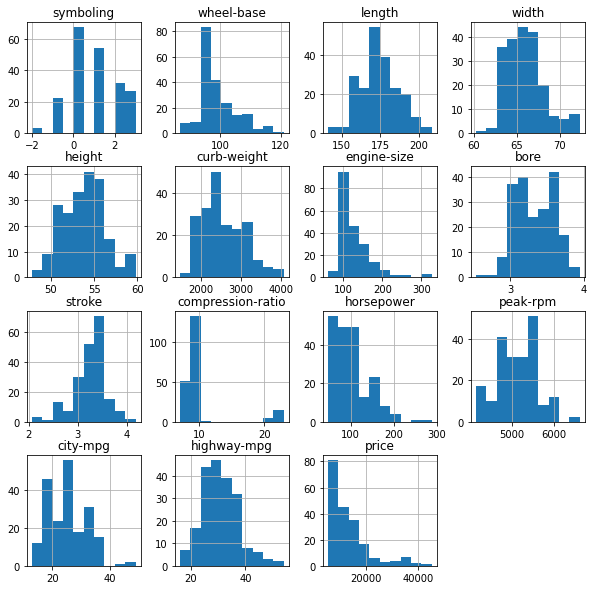

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
df.hist(ax=ax)
plt.show()

Como se puede observar en los histogramas tenemos en su mayoría datos que cuentan con una distribución normal, no obstante tenemos otros que tienen una distribución sesgada 

### Identificamos los outliers

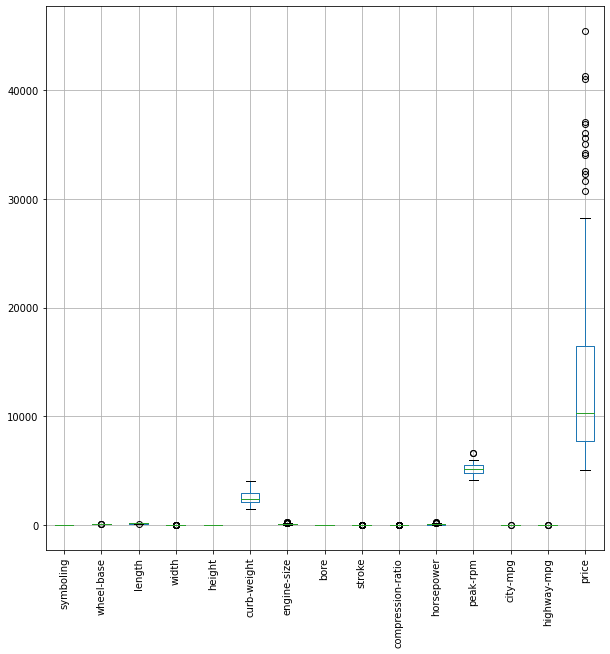

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
df.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()

Esto nos permite sin duda darnos cuenta de que existen distintas columnas, que cuentan con datos los cuales salen un poco del promedio, pero debido al poco contexto que tenemos sobre los datos, necesitamos de un análisis más profundo para poder decidir si dichos outliers deben ser eliminados, o son realmente partes del muestreo y no una falla como tal

In [10]:
df.columns.values

array(['symboling', 'make', 'fuel-type', 'aspiration', 'number-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'], dtype=object)

Un buen dato para poder predecir, sería el precio, por lo tanto primero necesitamos revisar si este dato tiene algunos registros faltantes

In [11]:
df['price'].isna().sum()

4

# Cambiando de datos map y one hot encoding

A datos que son de tipo numérico pero en string por así decirlo, como number-of-doors que tiene como datos {‘two’, ‘four’} se les aplico un map, para asignar dichas variables como numéricas y en el orden que ya se pre estableció

A datos mas generales como el tipo de sistema, combustible, etc. Se aplico un one hot encoding ya que realmente no tenían un orden como tal preestableció por lo tanto un map o un label encoding afectaría a la relevancia de los datos.

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
df[ohe.categories_[0]] = ohe.fit_transform(df[['fuel-type']])
df[ohe.categories_[0]] = ohe.fit_transform(df[['make']])
df[ohe.categories_[0]] = ohe.fit_transform(df[['engine-type']])
df[ohe.categories_[0]] = ohe.fit_transform(df[['fuel-system']])
df = df.drop(['fuel-type','make','fuel-system','engine-type'], axis=1) # remove the now encoded column

In [13]:
df['number-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [14]:
df['number-of-doors'] = df['number-of-doors'].map({'two': 2, 'four': 4})

In [15]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [16]:
df['aspiration'] = df['aspiration'].map({'std': 0, 'turbo': 1})

In [17]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [18]:
df['engine-location'] = df['engine-location'].map({'front': 1, 'rear': 0})

In [19]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [20]:
df['num-of-cylinders'] = df['num-of-cylinders'].map({'two': 2, 'three': 3,'four': 4, 'five': 5,'six': 6, 'eight': 8, 'twelve': 9})

In [21]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [22]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['body-style'] = label_encoder.fit_transform(df['body-style'])
df['drive-wheels'] = label_encoder.fit_transform(df['drive-wheels'])

### Revisamos nuestro data frame con nuestras variables ya todas de forma numérica

In [24]:
df

,symboling,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,2.0,0,2,1,88.6,168.8,64.1,48.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,0,2.0,0,2,1,88.6,168.8,64.1,48.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,2.0,2,2,1,94.5,171.2,65.5,52.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,0,4.0,3,1,1,99.8,176.6,66.2,54.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0,4.0,3,0,1,99.4,176.6,66.4,54.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,4.0,3,2,1,109.1,188.8,68.9,55.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,-1,1,4.0,3,2,1,109.1,188.8,68.8,55.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,-1,0,4.0,3,2,1,109.1,188.8,68.9,55.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,-1,1,4.0,3,2,1,109.1,188.8,68.9,55.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# División de data frame

##### Debido a que comenzaremos con el llenado de datos que se encuentren en NaN con la moda o el promedio procedemos a dividir nuestro data frame en la parte de train y test

Primero hacemos un shuffle del data frame con la finalidad de no siempre entrenar con los mismos datos si no que poner nuestro modelo realmente a prueba

In [25]:
df = df.sample(frac=1).reset_index(drop=True)

Obtenemos el numero de filas a dividir con un porcentaje en este caso 70%

In [26]:
Porcentaje_filas = round(df.shape[0]*.70)

In [27]:
df['price']

0       8921.0
1      22470.0
2       6377.0
3      13950.0
4       5348.0
        ...   
200    16558.0
201     9995.0
202        NaN
203    11845.0
204     5399.0
Name: price, Length: 205, dtype: float64

Obtenemos el data frame de test

In [28]:
df_Test = pd.DataFrame(df.iloc[Porcentaje_filas:,:])

Obtenemos el data frame de train

In [29]:
df = pd.DataFrame(df.iloc[:Porcentaje_filas,:])

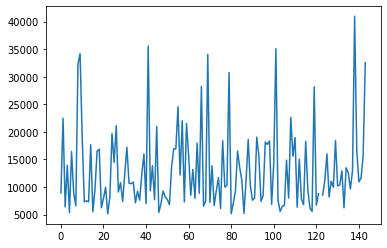

In [30]:
plt.plot(df['price'],label="Precio")

In [ ]:
df_Test.isna().sum()

In [ ]:
df.isna().sum()

In [31]:
df

,symboling,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,-1,0,4.0,4,1,1,103.3,174.6,64.6,59.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1,1,4.0,3,2,1,109.1,188.8,68.9,55.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0,2.0,2,1,1,93.7,157.3,63.8,50.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,4.0,3,1,1,99.8,176.6,66.2,54.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,2.0,2,1,1,95.7,158.7,63.6,54.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,0,4.0,3,2,1,107.9,186.7,68.4,56.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
140,3,0,2.0,2,2,1,95.3,169.0,65.7,49.6,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
141,3,0,2.0,0,1,1,94.5,159.3,64.2,55.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
142,-1,0,4.0,3,2,1,104.5,187.8,66.5,54.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Comenzamos con la imputación de datos, esto se tiene que realizar para cada data frame, en algunos casos elegiremos el promedio para valor más variables, mientras que para aquellos que representan más como una clase, seleccionaremos la moda

In [32]:
price_mean = df['price'].mean()
df['price'] = df['price'].fillna(value=price_mean)
df

price_meanTest = df_Test['price'].mean()
df_Test['price'] = df_Test['price'].fillna(value=price_meanTest)
df_Test

,symboling,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
144,0,0,2.0,2,1,1,96.5,167.5,65.2,53.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,3,0,2.0,2,1,1,99.1,186.6,66.5,56.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
146,2,0,2.0,2,1,1,96.1,176.8,66.6,50.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
147,0,0,4.0,4,0,1,96.9,173.6,65.4,54.9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0,0,4.0,4,1,1,95.7,169.7,63.6,59.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3,0,2.0,2,2,1,102.9,183.5,67.7,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,2,0,4.0,3,1,1,97.3,171.7,65.5,55.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0,0,4.0,3,1,1,94.5,155.9,63.6,52.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
203,3,0,2.0,2,2,1,95.3,169.0,65.7,49.6,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Tambien lo podemos hacer para las variables de bore y stroke

In [33]:
bore_mean = df['bore'].mean()
df['bore'] = df['bore'].fillna(value=bore_mean)

stroke_mean = df['stroke'].mean()
df['stroke'] = df['stroke'].fillna(value=stroke_mean)

bore_mean_Test = df_Test['bore'].mean()
df_Test['bore'] = df_Test['bore'].fillna(value=bore_mean_Test)

stroke_mean_test = df_Test['stroke'].mean()
df_Test['stroke'] = df_Test['stroke'].fillna(value=stroke_mean_test)

Para los categóricos, debido a que es un dato categórico, podemos usar la moda, así como horsepower y peak-rpm que representan más una clase que un valor númerico

In [34]:
doors_mode = df['number-of-doors'].mode()
df['number-of-doors'] = df['number-of-doors'].fillna(value=doors_mode[0])

horsepower_mode = df['horsepower'].mode()
df['horsepower'] = df['horsepower'].fillna(value=horsepower_mode[0])

doors_mode = df['peak-rpm'].mode()
df['peak-rpm'] = df['peak-rpm'].fillna(value=doors_mode[0])

# Test

doors_mode_test = df_Test['number-of-doors'].mode()
df_Test['number-of-doors'] = df_Test['number-of-doors'].fillna(value=doors_mode_test[0])

horsepower_mode_test = df_Test['horsepower'].mode()
df_Test['horsepower'] = df_Test['horsepower'].fillna(value=horsepower_mode_test[0])

doors_mode_test = df_Test['peak-rpm'].mode()
df_Test['peak-rpm'] = df_Test['peak-rpm'].fillna(value=doors_mode_test[0])

De este modo ya no tenemos NaN

In [35]:
df.isna().sum()

symboling            0
aspiration           0
number-of-doors      0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
diesel               0
gas                  0
alfa-romero          0
audi                 0
bmw                  0
chevrolet            0
dodge                0
honda                0
isuzu                0
jaguar               0
mazda                0
mercedes-benz        0
mercury              0
mitsubishi           0
nissan               0
peugot               0
plymouth             0
porsche              0
renault              0
saab                 0
subaru               0
toyota               0
volkswagen 

Primero transformamos el precio en float para poder revisar la correlación

In [36]:
df['price'] = df['price'].astype(float)
df_Test['price'] = df_Test['price'].astype(float)

# Prueba escalamiento

Podemos escalar nuestras variables, pero debido a que esta es nuestra primera iteración con el modelo y nos gustaría ver como es que los precios se muestran reflejados los dejaremos como están

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
st = scaler.fit_transform(df)
df = pd.DataFrame(st, columns=df.columns)
df.head()

st = scaler.fit_transform(df_Test)
df_Test = pd.DataFrame(st, columns=df.columns)

A continuación, podemos revisar la correlación únicamente como un primer acercamiento

In [39]:
df.corr()

,symboling,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
symboling,1.000000,-0.096382,-0.701972,-6.333229e-01,-0.100014,-0.206202,-0.579497,-0.432703,-0.264375,-0.618386,...,0.021861,2.534387e-01,-3.323366e-02,0.044746,2.062019e-01,-0.209880,NaN,-5.637746e-02,0.182120,0.079294
aspiration,-0.096382,1.000000,0.073581,7.755014e-02,0.094527,0.055708,0.232063,0.205495,0.277748,0.069429,...,-0.057211,-6.846943e-02,-1.138469e-01,-0.337118,-5.570786e-02,0.446365,NaN,-5.651781e-02,0.437873,-0.039253
number-of-doors,-0.701972,0.073581,1.000000,7.264274e-01,-0.010433,0.138435,0.521708,0.502509,0.311511,0.550504,...,-0.042231,-1.701474e-01,-3.749421e-02,-0.096195,-1.384347e-01,0.207633,NaN,1.162740e-01,-0.160203,-0.097545
body-style,-0.633323,0.077550,0.726427,1.000000e+00,-0.117486,0.220904,0.421761,0.375541,0.173842,0.563081,...,-0.070406,-1.044263e-01,-7.324388e-18,0.006296,-8.496300e-02,0.129513,NaN,-1.233581e-17,-0.104180,-0.059867
drive-wheels,-0.100014,0.094527,-0.010433,-1.174864e-01,1.000000,-0.143751,0.502999,0.537222,0.511560,0.058786,...,0.228423,1.766819e-01,-1.611031e-01,-0.532029,1.437513e-01,0.176715,NaN,5.067484e-01,-0.161103,0.101292
engine-location,-0.206202,0.055708,0.138435,2.209038e-01,-0.143751,1.000000,0.176707,0.042230,0.043878,0.098820,...,0.032420,1.731099e-02,2.878368e-02,0.085233,1.408451e-02,0.035783,NaN,-1.326862e-01,0.028784,0.009924
wheel-base,-0.579497,0.232063,0.521708,4.217611e-01,0.502999,0.176707,1.000000,0.880574,0.796293,0.626783,...,0.147365,-7.912898e-02,-1.958860e-01,-0.405387,-6.438065e-02,0.344452,NaN,3.649969e-01,-0.127118,-0.035812
length,-0.432703,0.205495,0.502509,3.755406e-01,0.537222,0.042230,0.880574,1.000000,0.846954,0.532348,...,0.227084,-5.073604e-02,-2.640645e-01,-0.510440,-4.127968e-02,0.254378,NaN,5.163897e-01,-0.084361,-0.004973
width,-0.264375,0.277748,0.311511,1.738416e-01,0.511560,0.043878,0.796293,0.846954,1.000000,0.339218,...,0.362186,-4.465502e-03,-1.983528e-01,-0.533923,-3.633207e-03,0.309677,NaN,4.560147e-01,-0.050017,-0.022816
height,-0.618386,0.069429,0.550504,5.630807e-01,0.058786,0.098820,0.626783,0.532348,0.339218,1.000000,...,-0.046363,-2.408438e-01,-7.168317e-03,-0.113972,-1.959545e-01,0.307271,NaN,1.388496e-01,-0.301207,-0.076476


Podemos realizar nuestro histograma de nuevo para revisar la variable precio

C:\Users\xmuse\AppData\Local\Temp\ipykernel_42688\574682684.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


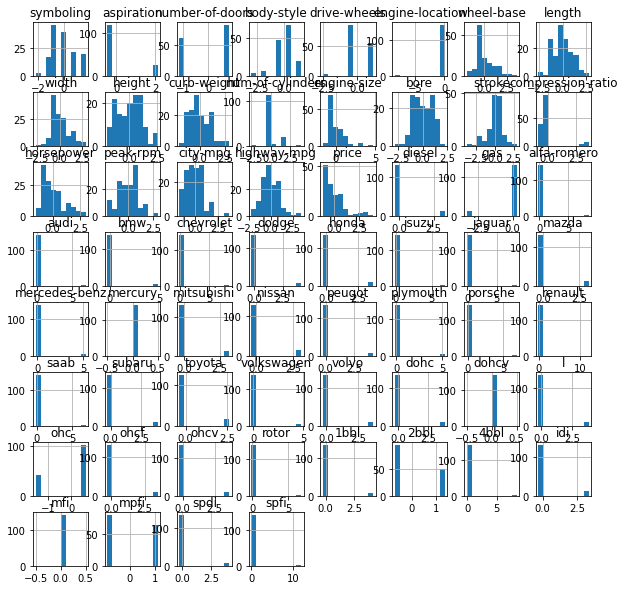

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
df.hist(ax=ax)
plt.show()

# Revisamos de nuevo la correlación para de esta forma ya comenzar a trabajar 100% en el modelo

In [41]:
pd.set_option('display.max_columns', None)
df.head(3)

,symboling,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,-1.419588,-0.469403,0.857286,1.575004,-0.664245,0.118678,0.763009,0.100738,-0.563498,2.523036,-0.008419,-0.349397,-0.082092,0.066330,0.648637,-0.391994,-0.409377,-0.322079,-0.208377,-0.126464,-0.557747,-0.301511,0.301511,-0.118678,-0.145865,-0.208514,-0.118678,4.123106,-0.273179,-0.145865,-0.118678,-0.315018,-0.189661,0.0,-0.315018,-0.328165,-0.242536,-0.189661,-0.145865,-0.083624,-0.145865,-0.258199,-0.377964,-0.208514,-0.273179,-0.258199,0.0,-0.258199,0.641689,-0.287588,-0.273179,-0.145865,-0.242536,1.392399,-0.118678,-0.301511,0.0,-0.894427,-0.242536,-0.083624
1,-1.419588,2.130367,0.857286,0.429547,1.211270,0.118678,1.709489,1.238177,1.519595,0.763334,1.306000,1.791586,0.508969,-1.134572,0.456901,3.552319,0.106474,-0.733426,0.109150,-0.577972,1.312964,3.316625,-3.316625,-0.118678,-0.145865,-0.208514,-0.118678,-0.242536,-0.273179,-0.145865,-0.118678,-0.315018,-0.189661,0.0,-0.315018,-0.328165,-0.242536,-0.189661,-0.145865,-0.083624,-0.145865,-0.258199,-0.377964,-0.208514,3.660601,-0.258199,0.0,-0.258199,0.641689,-0.287588,-0.273179,-0.145865,-0.242536,-0.718185,-0.118678,3.316625,0.0,-0.894427,-0.242536,-0.083624
2,0.158950,-0.469403,-1.166471,-0.715911,-0.664245,0.118678,-0.803579,-1.285014,-0.951051,-1.160062,-1.278509,-0.349397,-0.904438,-1.280136,-0.086349,-0.147175,-0.982544,0.706289,0.902969,1.077557,-0.908997,-0.301511,0.301511,-0.118678,-0.145865,-0.208514,-0.118678,4.123106,-0.273179,-0.145865,-0.118678,-0.315018,-0.189661,0.0,-0.315018,-0.328165,-0.242536,-0.189661,-0.145865,-0.083624,-0.145865,-0.258199,-0.377964,-0.208514,-0.273179,-0.258199,0.0,-0.258199,0.641689,-0.287588,-0.273179,-0.145865,-0.242536,1.392399,-0.118678,-0.301511,0.0,-0.894427,-0.242536,-0.083624


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          144 non-null    float64
 1   aspiration         144 non-null    float64
 2   number-of-doors    144 non-null    float64
 3   body-style         144 non-null    float64
 4   drive-wheels       144 non-null    float64
 5   engine-location    144 non-null    float64
 6   wheel-base         144 non-null    float64
 7   length             144 non-null    float64
 8   width              144 non-null    float64
 9   height             144 non-null    float64
 10  curb-weight        144 non-null    float64
 11  num-of-cylinders   144 non-null    float64
 12  engine-size        144 non-null    float64
 13  bore               144 non-null    float64
 14  stroke             144 non-null    float64
 15  compression-ratio  144 non-null    float64
 16  horsepower         144 non

#### Ahora revisaremos la correlación y el tipo de datos de nuestro data frame

In [43]:
matriz_corr = df.corr()
matriz_corr

,symboling,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
symboling,1.000000,-0.096382,-0.701972,-6.333229e-01,-0.100014,-0.206202,-0.579497,-0.432703,-0.264375,-0.618386,-0.266660,-0.120485,-0.130622,-1.834623e-01,-5.314540e-02,-0.194287,0.038367,0.232691,0.012237,0.080320,-0.108686,-0.209880,0.209880,0.112533,0.061561,-0.049144,0.018864,-9.305426e-03,-0.042823,0.023185,-0.074805,0.069198,-0.089608,NaN,0.260455,0.089163,-0.152875,-0.029731,0.253439,-0.052710,0.176688,-0.026889,-0.072507,0.142859,-0.452486,0.018398,NaN,-1.174614e-01,-0.077879,0.066347,0.021861,2.534387e-01,-3.323366e-02,0.044746,2.062019e-01,-0.209880,NaN,-5.637746e-02,0.182120,0.079294
aspiration,-0.096382,1.000000,0.073581,7.755014e-02,0.094527,0.055708,0.232063,0.205495,0.277748,0.069429,0.304544,-0.048048,0.109932,2.039265e-01,2.121630e-01,0.334605,0.258490,-0.184604,-0.195268,-0.238696,0.171899,0.446365,-0.446365,-0.055708,-0.068469,-0.097877,-0.055708,4.378727e-02,-0.128231,-0.068469,-0.055708,-0.147871,0.108202,NaN,0.230118,-0.093102,0.280239,0.009588,-0.068469,-0.039253,0.057936,-0.046615,-0.122828,-0.007529,0.226870,-0.046615,NaN,2.517216e-01,-0.016550,-0.067025,-0.057211,-6.846943e-02,-1.138469e-01,-0.337118,-5.570786e-02,0.446365,NaN,-5.651781e-02,0.437873,-0.039253
number-of-doors,-0.701972,0.073581,1.000000,7.264274e-01,-0.010433,0.138435,0.521708,0.502509,0.311511,0.550504,0.299963,0.088909,0.141164,2.057415e-01,5.062454e-02,0.187683,-0.003074,-0.203711,-0.102498,-0.113674,0.142707,0.207633,-0.207633,-0.138435,0.125048,0.038096,-0.018347,2.385995e-02,-0.042231,-0.071749,0.101741,-0.073220,0.009063,NaN,-0.171300,-0.098170,0.207922,0.009063,-0.170147,0.071690,0.026650,0.047173,-0.058431,0.038096,0.234193,-0.010886,NaN,1.632913e-01,0.006442,-0.018004,-0.042231,-1.701474e-01,-3.749421e-02,-0.096195,-1.384347e-01,0.207633,NaN,1.162740e-01,-0.160203,-0.097545
body-style,-0.633323,0.077550,0.726427,1.000000e+00,-0.117486,0.220904,0.421761,0.375541,0.173842,0.563081,0.165356,-0.011709,-0.020340,7.440720e-02,1.977855e-02,0.113614,-0.088593,-0.061249,-0.022890,-0.051030,-0.020308,0.129513,-0.129513,-0.220904,0.118350,0.089567,-0.016993,2.698459e-18,0.023469,0.006962,0.050978,-0.086740,-0.092331,NaN,-0.114497,0.060412,0.173634,-0.005431,-0.215814,0.131708,0.006962,0.110908,-0.150327,-0.029856,0.179926,-0.020539,NaN,1.437702e-01,0.004375,0.003743,-0.070406,-1.044263e-01,-7.324388e-18,0.006296,-8.496300e-02,0.129513,NaN,-1.233581e-17,-0.104180,-0.059867
drive-wheels,-0.100014,0.094527,-0.010433,-1.174864e-01,1.000000,-0.143751,0.502999,0.537222,0.511560,0.058786,0.619823,0.353501,0.559321,4.832081e-01,8.794358e-02,0.163353,0.597019,-0.051873,-0.518890,-0.511328,0.644969,0.176715,-0.176715,0.143751,-0.096890,0.252567,-0.078831,-1.611031e-01,-0.181458,0.085491,0.143751,0.017990,0.229730,NaN,-0.209249,-0.086094,0.293776,-0.125981,0.176682,-0.055547,-0.096890,-0.332926,0.063996,-0.138505,0.330894,0.258942,NaN,2.589424e-01,-0.318784,-0.240063,0.228423,1.766819e-01,-1.611031e-01,-0.532029,1.437513e-01,0.176715,NaN,5.067484e-01,-0.161103,0.101292
engine-location,-0.206202,0.055708,0.138435,2.209038e-01,-0.143751,1.000000,0.176707,0.042230,0.043878,0.098820,-0.049550,-0.212622,-0.209845,-1.806243e-01,1.353991e-01,0.014238,-0.356150,-0.181457,0.156622,0.104315,-0.332919,0.035783,-0.035783,0.014085,0.017311,0.024746,0.014085,2.878368e-02,0.032420,0.017311,0.014085,0.037386,0.022509,NaN,0.037386,0.038946,0.028784,0.022509,-0.813617,0.009924,0.017311,0.030643,0.044856,0.024746,0.032420,0.030643,NaN,3.064257e-02,0.184947,-0.412668,0.032420,1.731099e-02,2.8783

<AxesSubplot:>

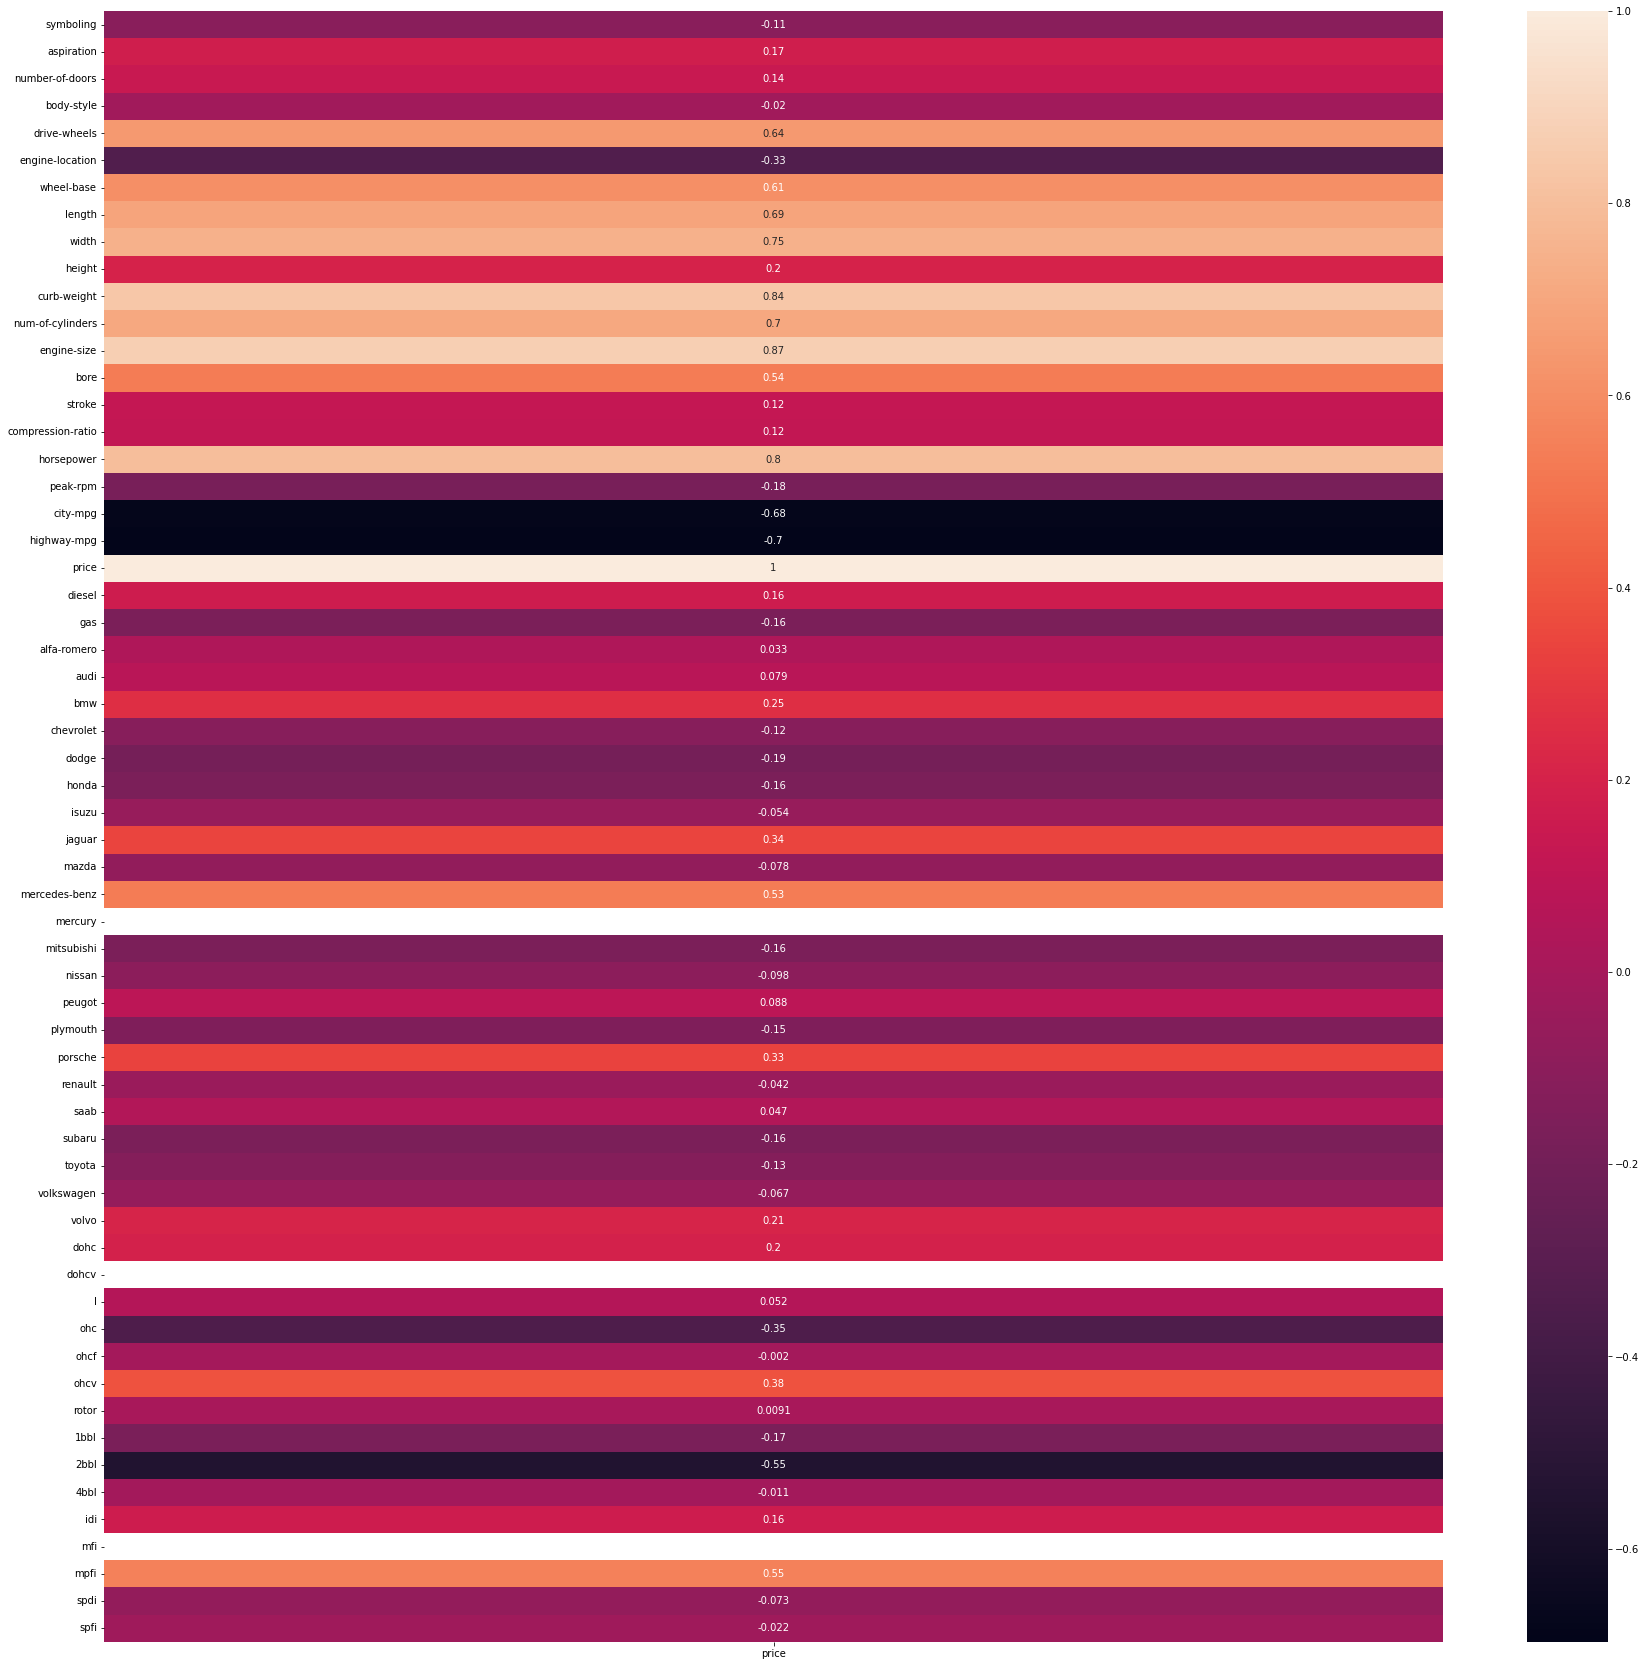

In [44]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(matriz_corr[['price']],annot=True)

### Debido al Heatmap anterior elegiremos las siguientes variables

Variables: engine-size, curb-weight, horsepower, num-of-cylinders, Debido a que en el heatmap por lo que podemos apreciar son las que más tienen relevancia

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          144 non-null    float64
 1   aspiration         144 non-null    float64
 2   number-of-doors    144 non-null    float64
 3   body-style         144 non-null    float64
 4   drive-wheels       144 non-null    float64
 5   engine-location    144 non-null    float64
 6   wheel-base         144 non-null    float64
 7   length             144 non-null    float64
 8   width              144 non-null    float64
 9   height             144 non-null    float64
 10  curb-weight        144 non-null    float64
 11  num-of-cylinders   144 non-null    float64
 12  engine-size        144 non-null    float64
 13  bore               144 non-null    float64
 14  stroke             144 non-null    float64
 15  compression-ratio  144 non-null    float64
 16  horsepower         144 non

# Identtificamos el vif de las variables seleccionadas

Tras varias pruebas nos quedaremos con el modelo más consistente

In [46]:
#df1 = df[['curb-weight', 'horsepower', 'price']] #72
#df2 = df1[['curb-weight', 'horsepower']] #72
#df1 = df[['engine-size','curb-weight', 'horsepower', 'price']] #78
#df2 = df1[['engine-size','curb-weight', 'horsepower']] #78
#df1 = df[['engine-size','curb-weight', 'price']] #78
#df2 = df1[['engine-size','curb-weight']] #78
#df1 = df[['horsepower','curb-weight','num-of-cylinders', 'price']] #75
#df2 = df1[['horsepower','curb-weight','num-of-cylinders']] #75
#df1 = df[['curb-weight','num-of-cylinders', 'price']] #74
#df2 = df1[['curb-weight','num-of-cylinders']] #74
#df1 = df[['engine-size','num-of-cylinders', 'price']] #76
#df2 = df1[['engine-size','num-of-cylinders']] #76
#df1 = df[['horsepower','num-of-cylinders', 'price']] #64
#df2 = df1[['horsepower','num-of-cylinders']] #64
#df1 = df[['engine-size','curb-weight','price']] #77
#df2 = df1[['engine-size','curb-weight']] #77

Teniendo como modelo final el siguiente, siendo uno de los más consistentes a lo largo de las pruebas con menos vif entre las variables

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["input_variables"] = X.columns
  vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif

#Posible final
df1 = df[['engine-size','horsepower','length','price']] #78
df2 = df1[['engine-size','horsepower','length']] #78



calc_vif(df2)

,input_variables,VIF
0,engine-size,3.617588
1,horsepower,2.734428
2,length,1.976958


Ponemos lo de test para hacer nuestro data frame

In [48]:
df3 = df_Test[['engine-size','horsepower','length','price']] #78
df4 = df3[['engine-size','horsepower','length']] #78

In [49]:
import statsmodels.api as sm
xtest = df4
xtest = sm.add_constant(xtest)

# Revisamos nuestro modelo

Primero con el summary para revisar los coeficientes, para este modelo utilizaremos Ordinary Least Squares (OLS) de la librería stats models

In [50]:
#Caracteristicas de entrada
x = df2
#Caracteristica de salida
y = df1['price']

#Generar el modelo de regresión
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     189.0
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           5.01e-49
Time:                        21:00:22   Log-Likelihood:                -87.732
No. Observations:                 144   AIC:                             183.5
Df Residuals:                     140   BIC:                             195.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.939e-18      0.038   1.85e-16      

Revisaremos la correlación con 'price' para estar seguro de que los coeficientes nos dan un modelo congruente

In [51]:
print(df1.corr()['price'])

engine-size    0.873684
horsepower     0.795908
length         0.693076
price          1.000000
Name: price, dtype: float64


In [52]:
df2

,engine-size,horsepower,length
0,-0.082092,-0.409377,0.100738
1,0.508969,0.106474,1.238177
2,-0.904438,-0.982544,-1.285014
3,-0.416170,-0.008160,0.260941
4,-0.853041,-1.154494,-1.172872
...,...,...,...
139,-0.133488,-0.151452,1.069964
140,-1.418404,-0.036818,-0.347829
141,-0.416170,-0.352060,-1.124811
142,1.177126,1.539392,1.158076


##### Realizamos la predicción

In [53]:
prediction = model.predict(x)
prediction

0     -0.140344
1      0.495473
2     -0.957011
3     -0.194834
4     -0.957834
         ...   
139    0.044152
140   -0.850242
141   -0.492818
142    1.238948
143    1.734231
Length: 144, dtype: float64

In [54]:
predictionTest = model.predict(xtest)
predictionTest

0    -0.472290
1     0.032477
2    -0.181668
3    -0.440630
4    -0.789815
        ...   
56    0.866449
57   -0.353795
58   -0.944538
59   -0.844733
60   -1.204791
Length: 61, dtype: float64

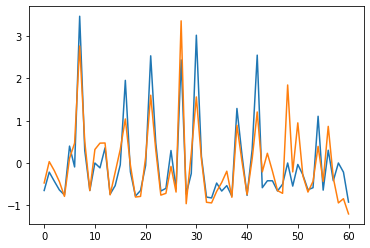

In [55]:
plt.plot(df_Test['price'],label="Predicción")
plt.plot(predictionTest,label="Predicción")

#### Evaluamos como es nuestra predicción en comparación con el real

Primero comparamos en una gráfica

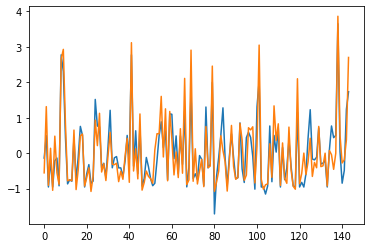

In [56]:
plt.plot(prediction,label="Predicción")
plt.plot(df['price'],label="Predicción")

#### Revisamos el score de nuestra $R^2$

Primero revisamos la $R^2$ en Train

In [57]:
from sklearn.metrics import r2_score
r2_score(df['price'], prediction)

0.8019792376717757

In [58]:
r2_score(df_Test['price'], predictionTest)

0.7251852160687685

Finalmente nos quedamos con este modelo puesto que nos representa una buena estabilidad en cuanto a nuestras predicciones 
Para poder mejorar nuestras predicciones podríamos hacer distintas mejoras, por ejemplo

* Normalizar los datos
* Estandarizarlos
* pasarlos por la formula de yeo-johnson
* se pueden trabajar los outliers (lo cual veremos en el siguiente bloque)
* Mejor comprensión y transformación de los datos con una mayor experiencia trabajando con data frames